# Figures

In [44]:
import pandas as pd
import numpy as np
from bokeh.charts import Bar, Scatter,Histogram,TimeSeries, output_file, show,save
# http://bokeh.pydata.org/en/0.11.0/docs/user_guide/charts.html

In [3]:
demo_df=pd.read_csv('Demographic_Statistics_By_Zip_Code.csv')
demo_df.head() # head shows us the first five rows of the dataframe

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100


In [4]:
def more_female(row):
    if row['PERCENT FEMALE']>=.5:
        return True
    else:
        return False

demo_df.loc[:,'MORE FEMALE']=demo_df.apply(more_female,axis=1)
demo_df.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL,MORE FEMALE
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,100,20,0.45,24,0.55,0,0,44,100,True
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,100,2,0.06,33,0.94,0,0,35,100,True
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,100,0,0.00,1,1.00,0,0,1,100,True
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0.00,0,0.00,0,0,0,0,False
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,100,0,0.00,2,1.00,0,0,2,100,True


# pandas default plotting

By default, pandas uses a plotting package called matplotlib to create some crude plots. It has basic functions to turn tables into plots

In [32]:
%matplotlib inline 
# This line makes sure our plots show up int jupyter notebook

The plot function will turn any column into a line plot

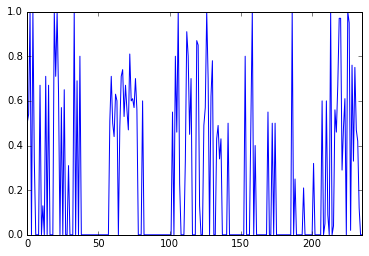

In [37]:
demo_df.loc[:,'PERCENT FEMALE'].plot()

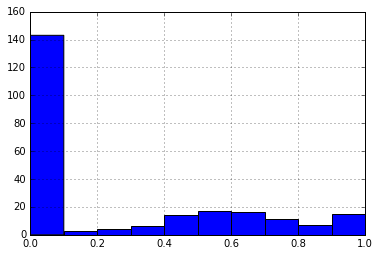

In [36]:
demo_df.loc[:,'PERCENT FEMALE'].hist()

# Bar graph

The bar graph function lets you map different categories (label=) onto the x-axis and their values (values=) onto the y-axis. In general, when you have two dimensions and the independent variable is categorical but the dependent variable is continuous, you'll want to use a bar graphs.

In [13]:
plot=Bar(data=demo_df,label='MORE FEMALE',values='PERCENT FEMALE')
output_file('bar_plot.html')
show(plot)

And bokeh allows you to make basic modifications to these plots, like change labels, gridlines, etc. You can read more about it [here](http://bokeh.pydata.org/en/0.9.3/docs/user_guide/charts.html)

In [ ]:
plot=Bar(demo_df,label='MORE FEMALE',values='PERCENT FEMALE',ylabel='hello!')
output_file('bar_plot_ylabel.html')
show(plot)

And if you're neurotic like me, you can also mess with the colors ([go nuts](http://i.stack.imgur.com/fMx2j.png))

In [14]:
plot=Bar(demo_df,label='MORE FEMALE',values='PERCENT FEMALE',ylabel='hello!',color='mediumslateblue')
output_file('bar_plot_color.html')
show(plot)

By default, Bar() takes the sum of all the values in each of the labels. But if we change the agg= argument we can tell it to do other operations like the mean a few other aggregations are listed [here](http://bokeh.pydata.org/en/0.11.0/docs/user_guide/charts.html#aggregations)

In [15]:
plot=Bar(demo_df,label='MORE FEMALE',values='PERCENT FEMALE',agg='mean',ylabel='Mean Percent Female')
output_file('bar_plot_mean.html')
show(plot)

# Scatter plot

Scatter plots are good for seeing how continuous variables interact

In [21]:
plot=Scatter(demo_df,x='PERCENT ASIAN NON HISPANIC',y='PERCENT RECEIVES PUBLIC ASSISTANCE')
output_file('scatter_plot_asian.html')
show(plot)

And Scatter() supports the same kind of aesthetic options like xlabel=

In [ ]:
plot=Scatter(demo_df,x='PERCENT BLACK NON HISPANIC',y='PERCENT RECEIVES PUBLIC ASSISTANCE',xlabel='Percent Black')
output_file('scatter_plot_black.html')
show(plot)

If you want to distinguish some categorical groups, you can also denote that you want the color (color=) or marker (marker=) to vary with some dimension

In [25]:
plot=Scatter(demo_df,x='PERCENT HISPANIC LATINO',y='PERCENT RECEIVES PUBLIC ASSISTANCE',color='MORE FEMALE')
output_file('scatter_plot_hispanic.html')
show(plot)

And we can add a legend to help people interpret our graph

In [ ]:
plot=Scatter(demo_df,x='PERCENT WHITE NON HISPANIC',y='PERCENT RECEIVES PUBLIC ASSISTANCE',marker='MORE FEMALE',legend='top_right')
output_file('scatter_plot_white.html')
show(plot)

# Time Series

If you think there's a temporal progression, then you'll want to connect these points and use TimeSeries() instead

In [49]:
ts_df=pd.DataFrame({'x_iter':[1,2,3,4,5],'y_val':[1.1,2.3,2.8,4.7,5.2]})
plot=TimeSeries(data=ts_df,x='x_iter',y='y_val')
output_file('timeseries.html')
show(plot)

# Histogram

Finally, if you want to look at a single continuous dimension, you can use a histogram. A histogram takes all the values along some dimensions, creates equal sized ranges (bins) and then counts how many datapoints are in each bin

In [29]:
plot=Histogram(demo_df,values='PERCENT RECEIVES PUBLIC ASSISTANCE')
output_file('histogram_plot.html')
show(plot)

Similar to scatterplots, we can also add extra layers (though this is usually a bit disorienting for a histogram)

In [31]:
plot=Histogram(demo_df,values='PERCENT RECEIVES PUBLIC ASSISTANCE',color='MORE FEMALE')
output_file('histogram_plot_female.html')
show(plot)